In [2]:
### Imports and metadata ###

import os
import sys
import glob
import time
import numpy as np
import tensorflow as tf 
from keras.layers import *
from keras.models import Model
import visualize
from Autoencoder import AutoEncoder
from AutoEncoderQuat import AutoEncoderQuat
from importlib import reload
from Xlib import display
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Using TensorFlow backend.


In [3]:
### Load data ###

data_path = 'data'
files = glob.glob(os.path.join(data_path, '*.csv'))
datasets = [np.genfromtxt(file, delimiter=',') for file in files]
train = np.concatenate(datasets, axis=0)
train = train - np.expand_dims(train[:,0],axis=-1)
train /= np.max(train)

batch_size=64

In [4]:
### Setup network ###

input_size = train.shape[1]

autoencoder = AutoEncoder(input_dim=input_size,
                          coding_dims=[50,40,30,25,15],
                          learning_rate=1e-7)
autoencoder.model_ae.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 66)                0         
_________________________________________________________________
input_bn (BatchNormalization (None, 66)                264       
_________________________________________________________________
encoding_step_0_fc (Dense)   (None, 50)                3350      
_________________________________________________________________
encoding_step_0 (LeakyReLU)  (None, 50)                0         
_________________________________________________________________
encoding_step_1_fc (Dense)   (None, 40)                2040      
_________________________________________________________________
encoding_step_1 (LeakyReLU)  (None, 40)                0         
_________________________________________________________________
enco

/home/maya/Workspace/Uni/L4P/Autoencoder.py:139: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("en...)`
  output=self.layers_encoder[-1].output)


In [5]:
### Train network ###

num_epochs = 75

autoencoder.train_epochs(x=train, y=train,
                    epochs=num_epochs,
                    repetitions=1,
                    validation_data=(train,train))

Instructions for updating:
Use tf.cast instead.
Train on 35168 samples, validate on 35168 samples
Epoch 1/75
35168/35168 [==============================] - 10s 275us/step - loss: 0.0228 - val_loss: 0.0034
Epoch 2/75
35168/35168 [==============================] - 8s 220us/step - loss: 0.0032 - val_loss: 0.0030
Epoch 3/75
35168/35168 [==============================] - 7s 211us/step - loss: 0.0026 - val_loss: 0.0021
Epoch 4/75
35168/35168 [==============================] - 8s 215us/step - loss: 0.0021 - val_loss: 0.0017
Epoch 5/75
35168/35168 [==============================] - 6s 184us/step - loss: 0.0019 - val_loss: 0.0016
Epoch 6/75
35168/35168 [==============================] - 7s 192us/step - loss: 0.0018 - val_loss: 0.0016
Epoch 7/75
35168/35168 [==============================] - 7s 193us/step - loss: 0.0017 - val_loss: 0.0013
Epoch 8/75
35168/35168 [==============================] - 6s 181us/step - loss: 0.0016 - val_loss: 0.0017
Epoch 9/75
35168/35168 [=============================

KeyboardInterrupt: 

In [6]:
### Make predictions ###

encoded_hands = autoencoder.encode(train)
decoded_hands = autoencoder.decode(encoded_hands)

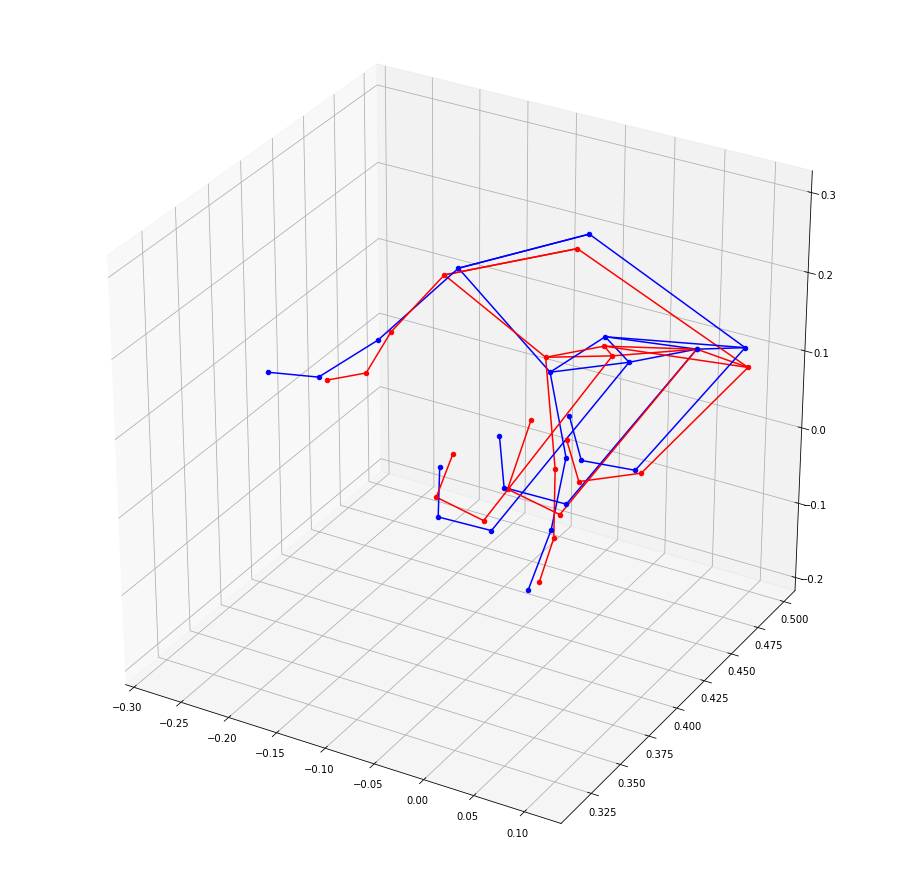

In [7]:

visualize.plot_reconstruction(train[0], decoded_hands[0])

<IPython.core.display.Javascript object>


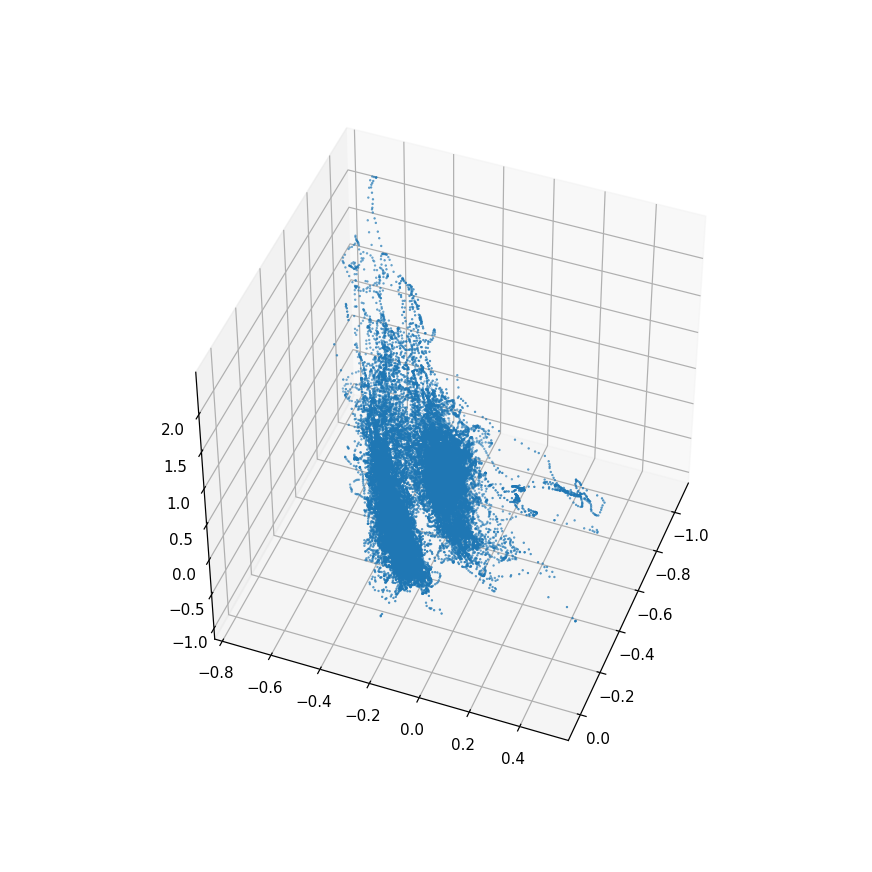

In [10]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_hands[:,0], encoded_hands[:,1], encoded_hands[:,2], s=0.3)